### Install python libraries

In [12]:
!pip install wget

In [4]:
import tensorflow as tf
import numpy as np
import pickle 
import tarfile
import wget
import os.path

### Load the CIFAR-100 dataset

In [5]:
# get dict of cifar data file
# TODO: fix byte string error e.g. dict key data -> b'data' after pickle.load!!!
def batch_to_dict(file):
    with open(file, "rb") as f:
        dict = pickle.load(f, encoding="bytes")
    return dict    

In [9]:
'''
convert batch_data to images

bdata: 10.000x3.072 array of uint8
one row = one 32x32 rgb image, first 1024 entries are red, second blue, third green
img is stored in row-major order -> first 32 entries of the array are the red channel values of the first row of the image
--------
[0]    |       [0]   |
[...]  |-> red [...] |-> red_img_1[0] ...
[1023] |       [32]  |
--------
[1024] |        [0]    | 
[...]  |-> green [...] |-> green_img_1[0] ...
[2048] |        [32]   |
--------
[2049] |         [0]  |
[...]  |-> blue [...] |-> blue_img_1[0]...
[3072] |         [32] |
--------
'''
def bdata_to_images(bdata):
    data = np.reshape(bdata, (-1,3,32,32))
    data = np.transpose(data, (0, 2, 3, 1))
        
    return data

In [10]:
cifar_data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
dl_dir = "cifar.tar.gz"
batches_dir = "cifar-batches"
train_batch_files = [batches_dir + "/data_batch_1",
               batches_dir + "/data_batch_2", 
               batches_dir + "/data_batch_3", 
               batches_dir + "/data_batch_4", 
               batches_dir + "/data_batch_5"]
test_batch_file = batches_dir + "/test_batch"

batch_meta = batches_dir + "/batches.meta"
batch_dicts = {}
test_batch_dict = {}
labels = []

# check if data set has been downloaded
if not os.path.exists(dl_dir):
    wget.download(cifar_data_url, dl_dir)

# extract the batches
if not os.path.exists(batches_dir):    
    tar = tarfile.open(dl_dir, "r:gz")
    for member in tar.getmembers():
        if member.isreg():
            member.name = os.path.basename(member.name)
            tar.extract(member, batches_dir)
    tar.close()

# convert train batches to dicts and save in batch_dicts
# dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
for batch in train_batch_files:
    d = batch_to_dict(batch)
    k = os.path.basename(batch)
    batch_dicts[k] = d

# convert test batch to dict
test_batch_dict = batch_to_dict(test_batch_file)
        
'''
b'num_cases_per_batch': 10000,
b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer',
b'dog', b'frog', b'horse', b'ship', b'truck'], 
b'num_vis': 3072
'''   
# list of all 10 classes
meta = batch_to_dict(batch_meta)
class_list = meta[b'label_names']

# get the labels for one batch
train_labels=batch_dicts["data_batch_1"][b'labels']
print(train_labels)

# get the data for one batch
train_data = bdata_to_images(batch_dicts["data_batch_1"][b'data']) 
print(train_data.shape)


[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

### Define Cnn etc.

In [76]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')
train_X = mnist.train.images
train_y = np.asarray(mnist.train.labels, dtype=np.int32)
test_X = mnist.test.images 
test_y = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Define a CNN model that can classify MNIST images w.r.t. the underlying digits 0-9

In [3]:
def model(features, labels, mode):
    
    # declare an input layer by reshaping the input feature to an arbitrary sequence (batch size) of 28x28 images with 1 channel
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
    # declare a 2-d convolutional layer with 8 filters, 5x5 kernels, "same" padding and ReLU activation function
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=8, kernel_size=[5,5], activation=tf.nn.relu ,padding='same')
    
    # declare a 2-d  max pooling layer with 2x2 pool size and stride 2
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2)
    
    # declare a 2-d convolutional layer with 16 filters, 5x5 kernels, "same" padding and ReLU activation function
    conv2 = tf.layers.conv2d(inputs=pool1, filters=16, kernel_size=[5,5], activation=tf.nn.relu, padding='same')
    
    # declare a 2-d  max pooling layer with 2x2 pool size and stride 2
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2)
    
    # flatten the last layer to an arbitray number (bathc size) of 1-d units
    pool2_flat = tf.layers.flatten(pool2)
    
    # declare a dense layer with 64 units and ReLU activation function
    dense = tf.layers.dense(inputs=pool2_flat, units=64, activation=tf.nn.relu)
    
    # declare a dense layer with 10 units (digit 0-9 output classes/logits)
    logits = tf.layers.dense(inputs=dense, units=10)

    predictions = tf.argmax(input=logits, axis=1)
    
    # return the estimator when predicting (no loss and training function needs to be defined here)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # declare the loss function sparse softmax cross entropy
    loss = tf.losses.sparse_softmax_cross_entropy(labels, logits)

    # declare a gradient descent optimizer with learning rate 0.001
    optimizer = tf.train.GradientDescentOptimizer(0.001)
    
    train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
    
    acc = tf.metrics.accuracy(labels=labels, predictions=predictions)
        
    # define the accuracy error metric
    eval_metric_ops = {
        "accuracy": acc
    }

    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, predictions=predictions, eval_metric_ops=eval_metric_ops)

### Create the Estimator and train the model for 25000 steps

In [4]:
mnist_classifier = tf.estimator.Estimator(model_fn=model, model_dir="ex_05_mnist_model")

train_input = tf.estimator.inputs.numpy_input_fn(x={"x": train_X}, y=train_y, batch_size=100, num_epochs=None, shuffle=True)
mnist_classifier.train(input_fn=train_input, steps=25000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ex_05_mnist_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5521588860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ex_05_mnist_model/model.ckpt-3
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkp

INFO:tensorflow:global_step/sec: 14.8268
INFO:tensorflow:loss = 0.47552118, step = 7304 (6.745 sec)
INFO:tensorflow:global_step/sec: 15.0533
INFO:tensorflow:loss = 0.276034, step = 7404 (6.643 sec)
INFO:tensorflow:global_step/sec: 14.8839
INFO:tensorflow:loss = 0.17884609, step = 7504 (6.719 sec)
INFO:tensorflow:global_step/sec: 14.9754
INFO:tensorflow:loss = 0.39007607, step = 7604 (6.677 sec)
INFO:tensorflow:global_step/sec: 14.9548
INFO:tensorflow:loss = 0.1482674, step = 7704 (6.687 sec)
INFO:tensorflow:global_step/sec: 14.9595
INFO:tensorflow:loss = 0.15195301, step = 7804 (6.685 sec)
INFO:tensorflow:global_step/sec: 14.9569
INFO:tensorflow:loss = 0.35590804, step = 7904 (6.686 sec)
INFO:tensorflow:global_step/sec: 14.8999
INFO:tensorflow:loss = 0.1764022, step = 8004 (6.711 sec)
INFO:tensorflow:global_step/sec: 14.9535
INFO:tensorflow:loss = 0.20723309, step = 8104 (6.689 sec)
INFO:tensorflow:global_step/sec: 14.9814
INFO:tensorflow:loss = 0.28100252, step = 8204 (6.673 sec)
INFO

INFO:tensorflow:global_step/sec: 14.9706
INFO:tensorflow:loss = 0.15923037, step = 15404 (6.679 sec)
INFO:tensorflow:global_step/sec: 14.9919
INFO:tensorflow:loss = 0.22201988, step = 15504 (6.670 sec)
INFO:tensorflow:global_step/sec: 14.9999
INFO:tensorflow:loss = 0.122646235, step = 15604 (6.668 sec)
INFO:tensorflow:global_step/sec: 14.9936
INFO:tensorflow:loss = 0.13283698, step = 15704 (6.668 sec)
INFO:tensorflow:global_step/sec: 15.0085
INFO:tensorflow:loss = 0.0747946, step = 15804 (6.663 sec)
INFO:tensorflow:global_step/sec: 14.8925
INFO:tensorflow:loss = 0.22133245, step = 15904 (6.715 sec)
INFO:tensorflow:global_step/sec: 14.9901
INFO:tensorflow:loss = 0.15554099, step = 16004 (6.671 sec)
INFO:tensorflow:global_step/sec: 14.968
INFO:tensorflow:loss = 0.25225675, step = 16104 (6.681 sec)
INFO:tensorflow:global_step/sec: 15.0238
INFO:tensorflow:loss = 0.06510007, step = 16204 (6.657 sec)
INFO:tensorflow:global_step/sec: 14.9888
INFO:tensorflow:loss = 0.14379229, step = 16304 (6.

INFO:tensorflow:global_step/sec: 15.0195
INFO:tensorflow:loss = 0.12886645, step = 23504 (6.658 sec)
INFO:tensorflow:global_step/sec: 15.0317
INFO:tensorflow:loss = 0.14639243, step = 23604 (6.653 sec)
INFO:tensorflow:global_step/sec: 15.0527
INFO:tensorflow:loss = 0.13036062, step = 23704 (6.644 sec)
INFO:tensorflow:global_step/sec: 14.9905
INFO:tensorflow:loss = 0.060711395, step = 23804 (6.670 sec)
INFO:tensorflow:global_step/sec: 15.0305
INFO:tensorflow:loss = 0.08380287, step = 23904 (6.654 sec)
INFO:tensorflow:global_step/sec: 15.0336
INFO:tensorflow:loss = 0.13639396, step = 24004 (6.652 sec)
INFO:tensorflow:global_step/sec: 15.0533
INFO:tensorflow:loss = 0.09408196, step = 24104 (6.643 sec)
INFO:tensorflow:global_step/sec: 15.0696
INFO:tensorflow:loss = 0.10328469, step = 24204 (6.635 sec)
INFO:tensorflow:global_step/sec: 15.0766
INFO:tensorflow:loss = 0.18858045, step = 24304 (6.633 sec)
INFO:tensorflow:global_step/sec: 14.9631
INFO:tensorflow:loss = 0.14919291, step = 24404 (

### Evaluate the model and print results

In [5]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": test_X}, y=test_y, num_epochs=1, shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-03-18:14:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ex_05_mnist_model/model.ckpt-25003
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-03-18:14:12
INFO:tensorflow:Saving dict for global step 25003: accuracy = 0.968, global_step = 25003, loss = 0.108947225
{'accuracy': 0.968, 'loss': 0.108947225, 'global_step': 25003}


### Show some examples

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

true labels:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ex_05_mnist_model/model.ckpt-25003
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
predictions:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]


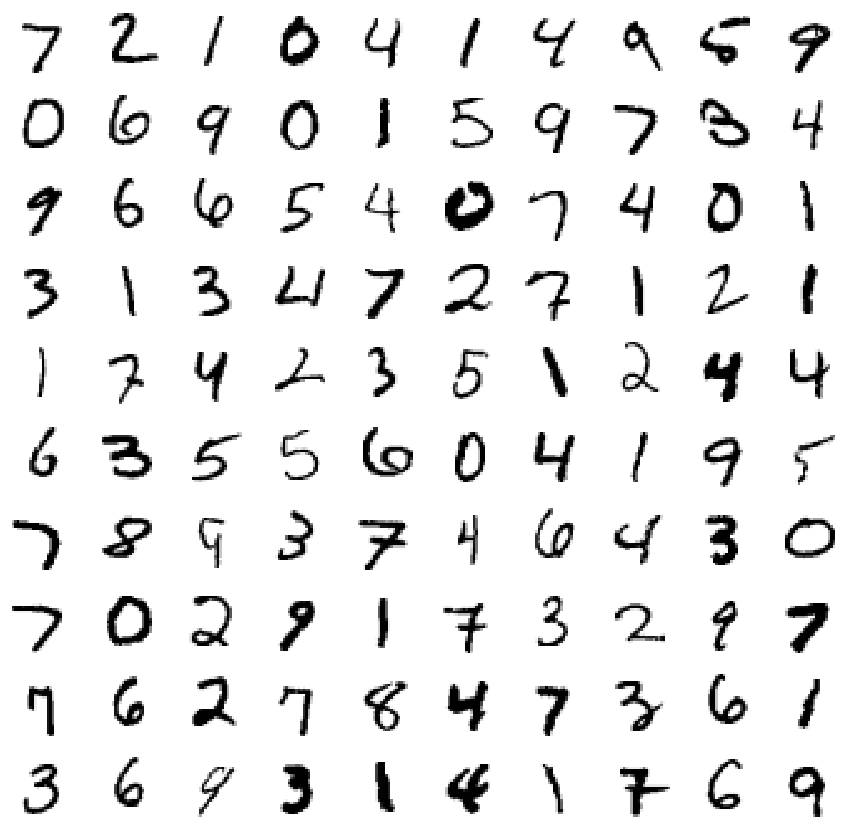

In [7]:
figure, subplots = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        subplots[i][j].axis('off')
        subplots[i][j].imshow(np.reshape(test_X[j+10*i], (28,28)), cmap='binary')
print("true labels:")
print(test_y[:100])

predict_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": test_X[:100]}, shuffle=False)
predictions = np.array([label for label in mnist_classifier.predict(input_fn=predict_input_fn)])
print("predictions:")
print(predictions)